## Vad är sambandet mellan en bils vikt och displacement?
### En statisks analys av auto-mpg.csv

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

auto_mpg = pd.read_csv("./auto-mpg.csv")

auto_mpg.replace("?", np.nan, inplace=True) # I auto-mpg.csv så betäcknas saknad data som ett "?", så jag ändrar alla "?" till NaN värden.

### Histogram av både vikt och acceleration

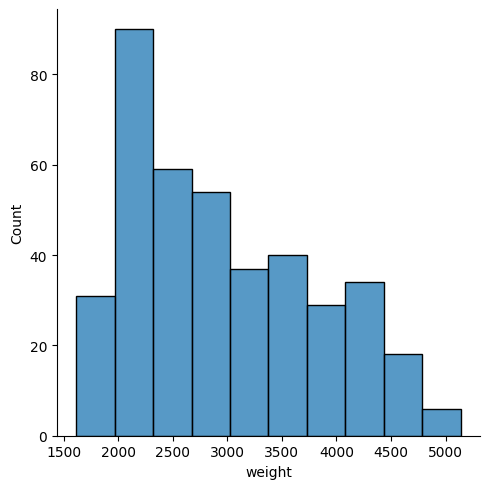

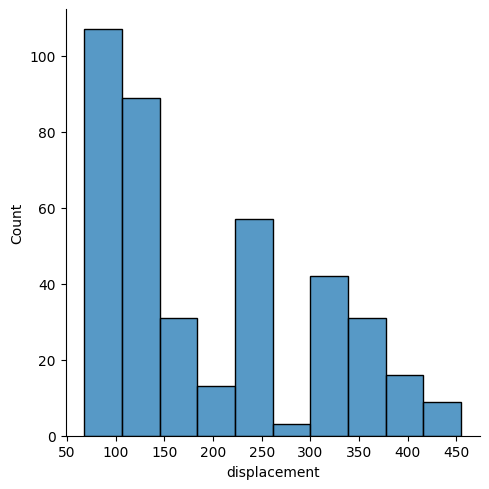

In [28]:
sns.displot(auto_mpg, x="weight")
sns.displot(auto_mpg, x="displacement")

### Deskriptiva mått
Jag börjar först med att räkna ut både bilarnas vikt (weight) och displacement medelvärde, median och standardavvikelse med hjälp av pandas .describe()

In [29]:
weight_desc = auto_mpg["weight"].describe()
displacement_desc = auto_mpg["displacement"].describe()

print(f"Vikt:")
print(weight_desc)
print()
print(f"displacement:")
print(displacement_desc)

Vikt:
count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

displacement:
count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64


### Scatterplot

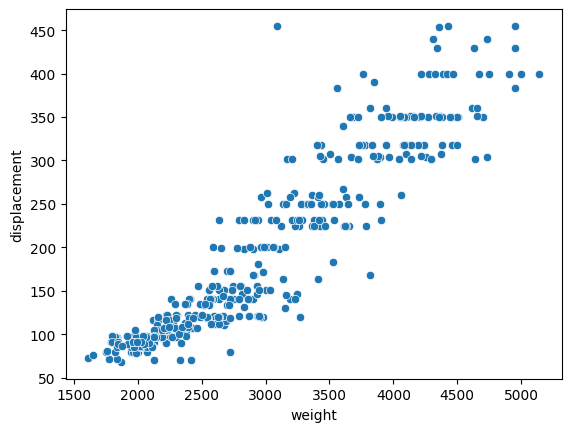

In [30]:
sns.scatterplot(data=auto_mpg, x="weight", y="displacement")
plt.show()

### Konfidenceintervall för både vikt och displacement
Jag skapade dessa två för att bättre förstå vart majoritet av datan (95%) ligger. Jag använder mig av interval() från SciPys T-module för att konstruera intervallen.

In [31]:
from scipy.stats import t

mean_weight = auto_mpg["weight"].mean()
std_weight = auto_mpg["weight"].std()
sem_weight = scs.sem(auto_mpg["weight"])

mean_displacement = auto_mpg["displacement"].mean()
std_displacement = auto_mpg["displacement"].std()
sem_displacement = scs.sem(auto_mpg["displacement"])

auto_n = len(auto_mpg)
signifikans = 0.05

In [32]:
weight_lower, weight_upper = t.interval(confidence=1-signifikans, df=auto_n-1, loc=mean_weight, scale=sem_weight)

displacement_lower, displacement_upper = t.interval(confidence=1-signifikans, df=auto_n-1, loc=mean_displacement, scale=sem_displacement)

print(f"Konfidensintervallen där 95% av populationen befinner sig för bilars vikt är {weight_lower} {weight_upper}")
print()
print(f"Konfidensintervallen där 95% av populationen befinner sig för bilars displacement är {displacement_lower} {displacement_upper}")

Konfidensintervallen där 95% av populationen befinner sig för bilars vikt är 2886.972988774569 3053.876257456587

Konfidensintervallen där 95% av populationen befinner sig för bilars displacement är 183.15065600462634 203.7011027893435


### Hypotestest
* H0 = Det finns ingen signifikant korrelation mellan bilars vikt och displacement.
* H1 = Det finns en signifikant korrelation mellan bilars vikt och displacement.

### Regressionanalys av korrelationen mellan bilars vikt och displacement

In [38]:
model = ols("weight ~ displacement", data=auto_mpg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     2654.
Date:                Sun, 04 Feb 2024   Prob (F-statistic):          1.22e-177
Time:                        23:02:09   Log-Likelihood:                -2841.1
No. Observations:                 398   AIC:                             5686.
Df Residuals:                     396   BIC:                             5694.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1505.0187     32.306     46.586   

### Plotta Linjär regression

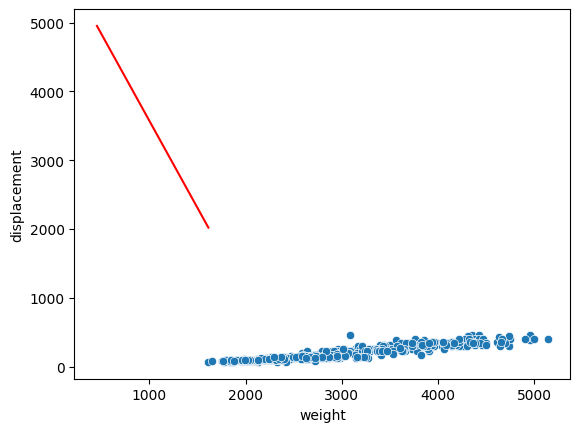

In [39]:
predictions = model.predict(auto_mpg["displacement"])

prediction_plot = sns.scatterplot(data=auto_mpg, x="weight", y="displacement")

prediction_plot.plot([auto_mpg["weight"].min(), auto_mpg["displacement"].max()],
                  [predictions.min(), predictions.max()],
                  "r", label="OLS prediction")
plt.show()